<h1>Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes</h1>
<p>A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:</p>
<ul><li>Seleção</li>
<li>Limpeza</li>
<li>Codificação</li>
<li>Enriquecimento</li>
<li>Normalização</li>
<li>Construção de Atributos</li>
<li>Correção de Prevalência</li>
<li>Partição do Conjunto de Dados</li>
</ul>
<p>Busque uma base de dados na UCI Machine Learning que seja indicada para problemas de classificação. (<a target="_blank" href="https://archive.ics.uci.edu/datasets">https://archive.ics.uci.edu/datasets</a>)</p>
<p>Para esse exemplo, vou usar a base de segmentação de imagens (https://archive.ics.uci.edu/dataset/50/image+segmentation)</p>


Baixando o dataset direto do site da UCI.


In [142]:
# base de dados disponível na UCI Machine Learning - https://archive.ics.uci.edu/dataset/50/image+segmentation

from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
img_segmentation_repo = fetch_ucirepo(id=50) 
  
# data (as pandas dataframes) 
img_seg_features = img_segmentation_repo.data.features 
img_seg_target = img_segmentation_repo.data.targets 

img_seg_df = pd.concat([img_seg_features, img_seg_target], axis=1)
  
# metadata 
print(img_segmentation_repo.metadata) 
  
# variable information 
print(img_segmentation_repo.variables) 

{'uci_id': 50, 'name': 'Image Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/50/image+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/50/data.csv', 'abstract': 'Image data described by high-level numeric-valued attributes, 7 classes', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2310, 'num_features': 19, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5GP4N', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The instances were drawn randomly from a database of 7 outdoor images.  The images were handsegmented to create a classification for every pixel.  \r\n\r\n   Each instance is a 3x3 region.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_dat

In [143]:
img_seg_df.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,BRICKFACE
1,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,BRICKFACE
2,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,BRICKFACE
3,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,BRICKFACE
4,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,BRICKFACE


In [144]:
img_seg_df.describe()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931


In [145]:
img_seg_df['class'].value_counts()

class
BRICKFACE    30
SKY          30
FOLIAGE      30
CEMENT       30
WINDOW       30
PATH         30
GRASS        30
Name: count, dtype: int64

<h2>Hora de realizar os tratamentos<h2>
<p>no exemplo, iremos normalizar as colunas, remover a coluna de identificação e separar a classe dos atributos.</p>

In [146]:
# Tipos das colunas
img_seg_df.dtypes

region-centroid-col     float64
region-centroid-row     float64
region-pixel-count        int64
short-line-density-5    float64
short-line-density-2    float64
vedge-mean              float64
vedge-sd                float64
hedge-mean              float64
hedge-sd                float64
intensity-mean          float64
rawred-mean             float64
rawblue-mean            float64
rawgreen-mean           float64
exred-mean              float64
exblue-mean             float64
exgreen-mean            float64
value-mean              float64
saturation-mean         float64
hue-mean                float64
class                    object
dtype: object

In [147]:
# Verificação de dados ausentes
img_seg_df.isnull().sum()

region-centroid-col     0
region-centroid-row     0
region-pixel-count      0
short-line-density-5    0
short-line-density-2    0
vedge-mean              0
vedge-sd                0
hedge-mean              0
hedge-sd                0
intensity-mean          0
rawred-mean             0
rawblue-mean            0
rawgreen-mean           0
exred-mean              0
exblue-mean             0
exgreen-mean            0
value-mean              0
saturation-mean         0
hue-mean                0
class                   0
dtype: int64

In [148]:
# Verificação de colunas com dados únicos
img_seg_df.nunique()

region-centroid-col     139
region-centroid-row     139
region-pixel-count        1
short-line-density-5      2
short-line-density-2      3
vedge-mean              160
vedge-sd                202
hedge-mean              164
hedge-sd                202
intensity-mean          196
rawred-mean             160
rawblue-mean            175
rawgreen-mean           154
exred-mean              156
exblue-mean             168
exgreen-mean            151
value-mean              175
saturation-mean         202
hue-mean                202
class                     7
dtype: int64

In [149]:
# removendo a feature com dados únicos
img_seg_df = img_seg_df.drop('region-pixel-count', axis=1)
img_seg_df.nunique()

region-centroid-col     139
region-centroid-row     139
short-line-density-5      2
short-line-density-2      3
vedge-mean              160
vedge-sd                202
hedge-mean              164
hedge-sd                202
intensity-mean          196
rawred-mean             160
rawblue-mean            175
rawgreen-mean           154
exred-mean              156
exblue-mean             168
exgreen-mean            151
value-mean              175
saturation-mean         202
hue-mean                202
class                     7
dtype: int64

In [150]:
# verificação de valores com baixa representação ou ocorrência
num_linhas = img_seg_df.shape[0]
cols = []
for c in img_seg_df.columns:
    num_unicos = len( img_seg_df[c].unique() )
    percentage = float(num_unicos) / num_linhas * 100
    if percentage < 1:
        print('%s, %d, %.1f%%' % (c, num_unicos, percentage))
        cols.append(c)

short-line-density-5, 2, 1.0%


In [151]:
# removendo feature com baixa representatividade
img_seg_df = img_seg_df.drop('short-line-density-5', axis=1)

In [152]:
# Verificação e remoção de duplicados
print("Número de linhas duplicadas: ", img_seg_df.duplicated().sum())

img_seg_df_df_no_dups = img_seg_df.drop_duplicates()
print("Total de padrões: ", img_seg_df.shape[0])
print("Total de padrões após remoção de duplicados: ", img_seg_df_df_no_dups.shape[0])

Número de linhas duplicadas:  0
Total de padrões:  210
Total de padrões após remoção de duplicados:  210


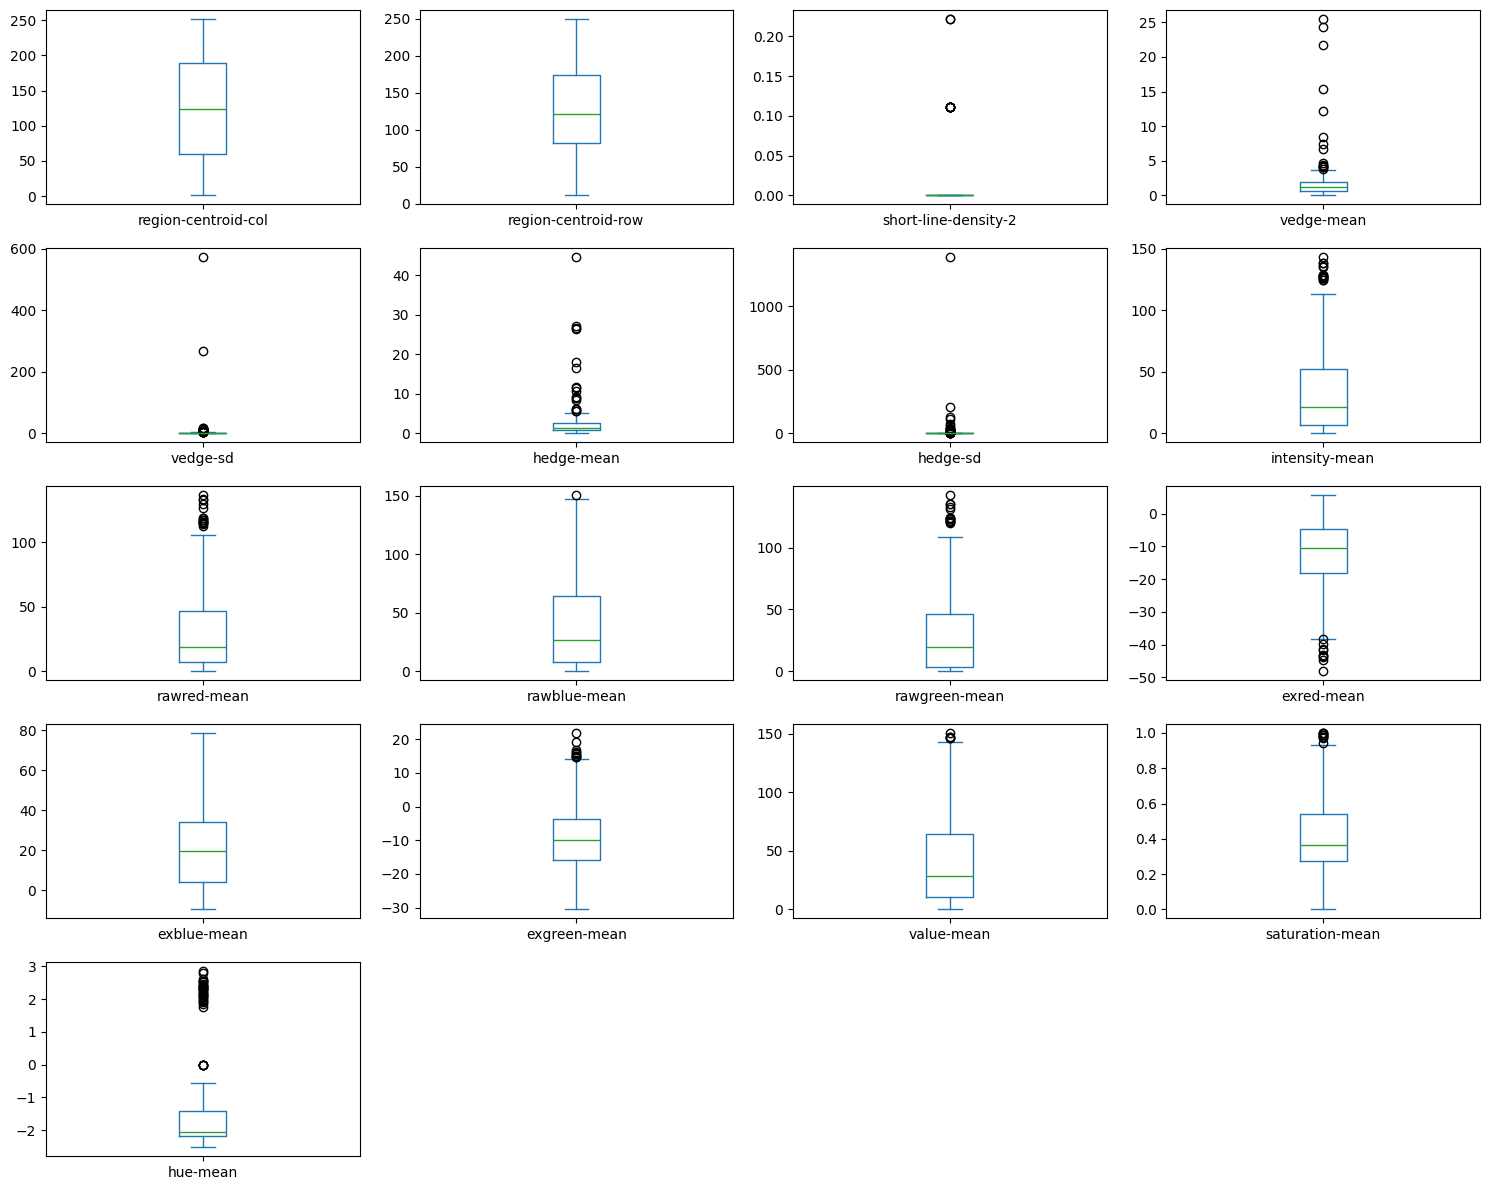

Total de linhas que contem pelo menos um outlier: 15
Total de padrões com outilers:  210
Total de padrões após remoção de outilers:  195


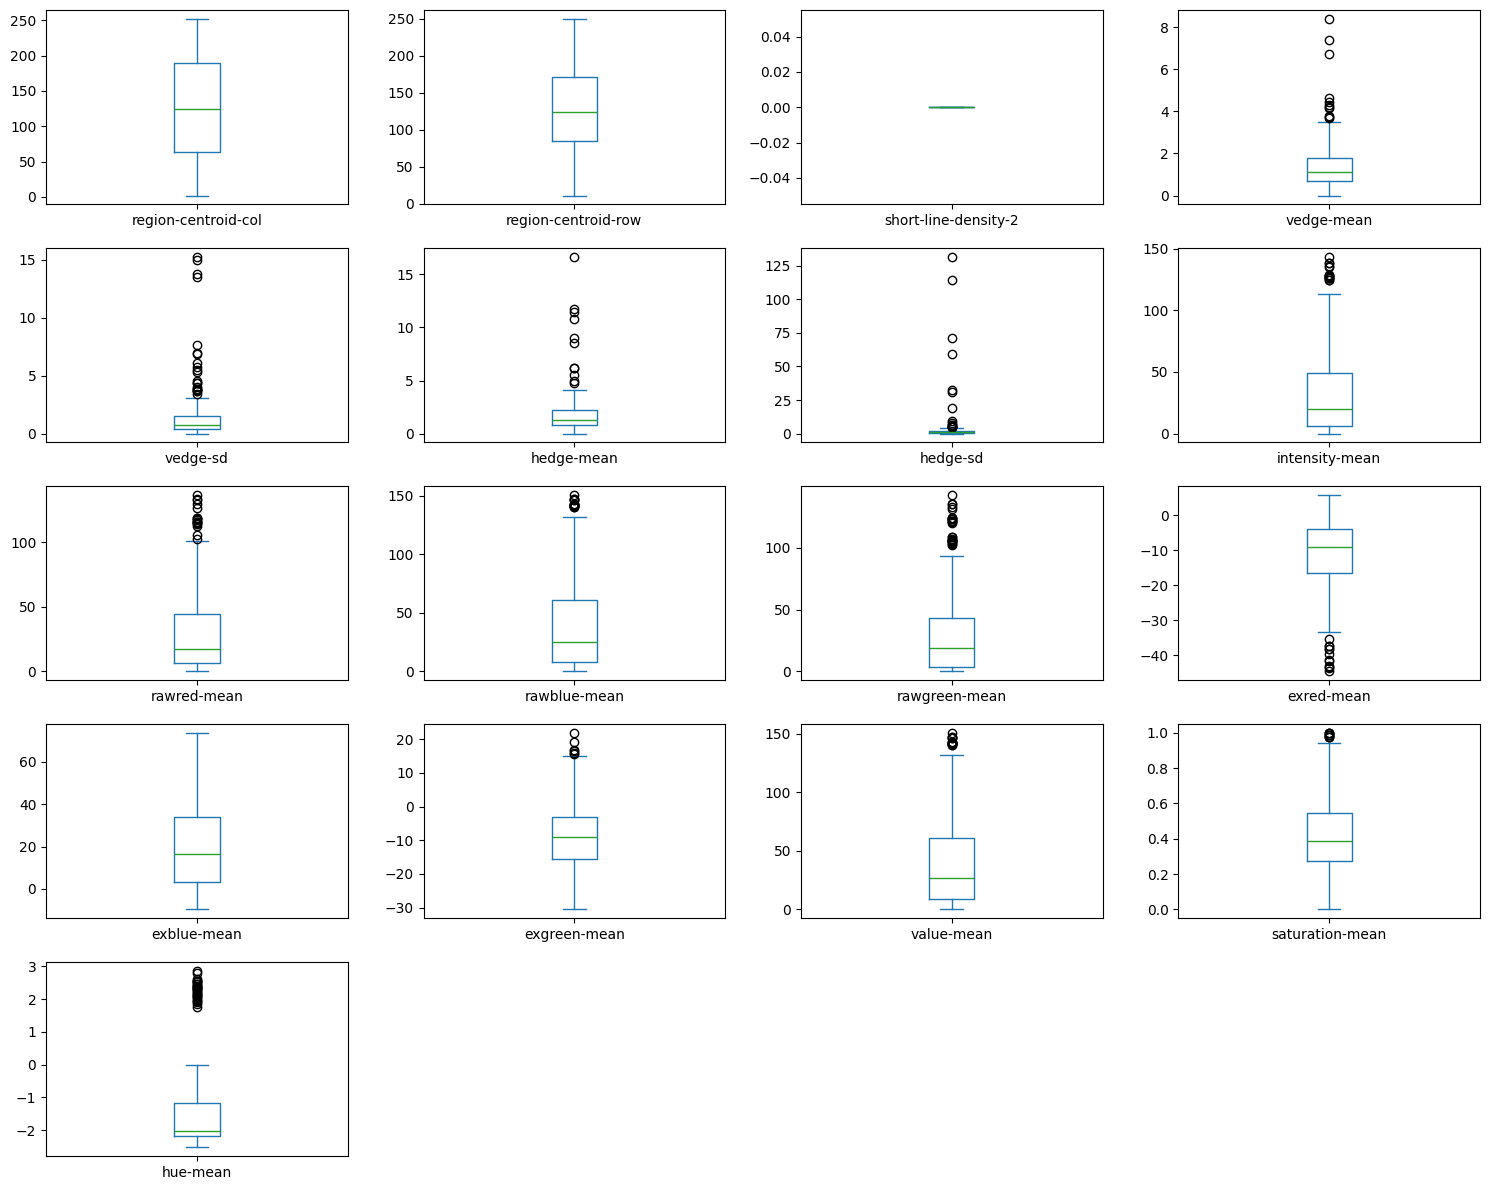

In [153]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

# Busca por outliers
img_seg_df_df_no_dups.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

z_scores = img_seg_df_df_no_dups.select_dtypes(include='number').apply(zscore)
outliers = (abs(z_scores) > 3)  # Z-score > 3 considered outlier

print("Total de linhas que contem pelo menos um outlier:", np.sum(np.any(outliers, axis=1)))

img_seg_df_df_no_dups_no_outliers = img_seg_df_df_no_dups[(~outliers).all(axis=1)]
print("Total de padrões com outilers: ", img_seg_df_df_no_dups.shape[0])
print("Total de padrões após remoção de outilers: ", img_seg_df_df_no_dups_no_outliers.shape[0])

img_seg_df_df_no_dups_no_outliers.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [154]:
X = img_seg_df_df_no_dups_no_outliers.drop('class', axis=1)
print(X.head())
Y = img_seg_df_df_no_dups_no_outliers['class']
print(Y.unique())

   region-centroid-col  region-centroid-row  short-line-density-2  vedge-mean  \
0                140.0                125.0                   0.0    0.277778   
1                188.0                133.0                   0.0    0.333333   
2                105.0                139.0                   0.0    0.277778   
3                 34.0                137.0                   0.0    0.500000   
4                 39.0                111.0                   0.0    0.722222   

   vedge-sd  hedge-mean  hedge-sd  intensity-mean  rawred-mean  rawblue-mean  \
0  0.062963    0.666667  0.311111        6.185185     7.333334      7.666666   
1  0.266667    0.500000  0.077778        6.666666     8.333334      7.777778   
2  0.107407    0.833333  0.522222        6.111111     7.555555      7.222222   
3  0.166667    1.111111  0.474074        5.851852     7.777778      6.444445   
4  0.374074    0.888889  0.429629        6.037037     7.000000      7.666666   

   rawgreen-mean  exred-mean  ex

In [155]:
print(X.shape)
print(Y.shape)

(195, 17)
(195,)


In [156]:
# Feature selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

sfs = SequentialFeatureSelector(LogisticRegression(solver='liblinear', max_iter=1000), n_features_to_select=10, direction='forward')
sfs.fit(X, Y)

selected_features = X.columns[sfs.get_support()]
X = X[selected_features]
print(selected_features)

Index(['region-centroid-col', 'region-centroid-row', 'short-line-density-2',
       'vedge-sd', 'intensity-mean', 'rawred-mean', 'rawgreen-mean',
       'exred-mean', 'value-mean', 'saturation-mean'],
      dtype='object')


Na próxima seção que deverão ser realizada as tentativas de tratamento de dados, visando a melhoria no desempenho do classificador (SVM).

In [157]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
import pandas as pd

X_orig = img_seg_df.drop('class', axis=1)
Y_orig = img_seg_df['class']
print(X_orig.head())
print(Y_orig.unique() )

# normalização min-max
X = pd.DataFrame( minmax_scale(X) )

print(X_orig.head())
print(X.head())

   region-centroid-col  region-centroid-row  short-line-density-2  vedge-mean  \
0                140.0                125.0                   0.0    0.277778   
1                188.0                133.0                   0.0    0.333333   
2                105.0                139.0                   0.0    0.277778   
3                 34.0                137.0                   0.0    0.500000   
4                 39.0                111.0                   0.0    0.722222   

   vedge-sd  hedge-mean  hedge-sd  intensity-mean  rawred-mean  rawblue-mean  \
0  0.062963    0.666667  0.311111        6.185185     7.333334      7.666666   
1  0.266667    0.500000  0.077778        6.666666     8.333334      7.777778   
2  0.107407    0.833333  0.522222        6.111111     7.555555      7.222222   
3  0.166667    1.111111  0.474074        5.851852     7.777778      6.444445   
4  0.374074    0.888889  0.429629        6.037037     7.000000      7.666666   

   rawgreen-mean  exred-mean  ex

       0         1    2         3         4         5         6         7  \
0  0.552  0.476987  0.0  0.004125  0.043119  0.053571  0.024942  0.953744   
1  0.744  0.510460  0.0  0.017471  0.046476  0.060877  0.027280  0.984581   
2  0.412  0.535565  0.0  0.007037  0.042603  0.055195  0.024942  0.971366   
3  0.128  0.527197  0.0  0.010920  0.040795  0.056818  0.023383  1.000000   
4  0.148  0.418410  0.0  0.024509  0.042086  0.051136  0.024162  0.942731   

          8         9  
0  0.051546  0.545635  
1  0.055965  0.538580  
2  0.050074  0.532628  
3  0.051546  0.573633  
4  0.052283  0.562919  


KeyError: 'intensity-mean'

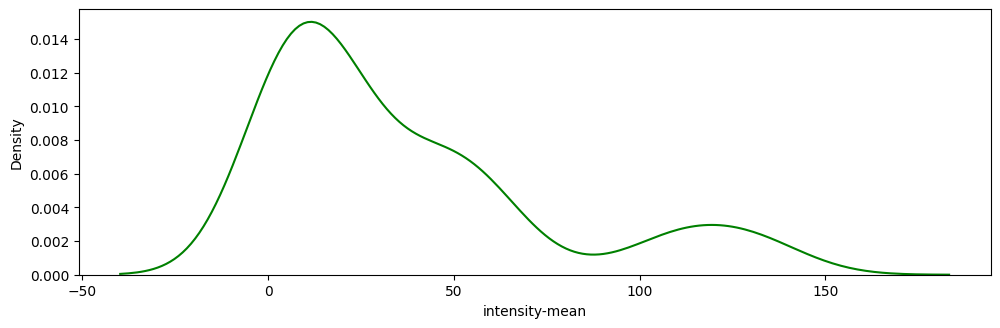

In [160]:
# Visualização do efeito da normalização em um feature.
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
import scipy.stats as scs
import matplotlib.pyplot as plt

df_data_normalized = X.copy()
df_data_normalized = df_data_normalized.rename(columns={10: 'intensity-mean'})
plt.figure(figsize = (40,20))
for idx, col in enumerate(list(['intensity-mean'])):
    plt.subplot(5,3,idx + 1)
    sns.kdeplot(img_seg_df[col], color = 'g',label = f"Input data(Unscaled):{col}")
    sns.kdeplot(df_data_normalized[col],color = 'b', label = f"Input data(Normalized):{col}" )    
    plt.legend()
plt.show()

A próxima seção trata da construção do modelo, dos testes e das métricas da matriz de confusão.

In [161]:
print(X_orig.shape)
print(Y_orig.shape)

(210, 17)
(210,)


In [162]:
from sklearn.model_selection import train_test_split
import numpy as np

# com os dados originais
X_oring_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig,
                      Y_orig, test_size=0.25, stratify=Y_orig,random_state=10)

# com os dados tratados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                    stratify=Y,random_state=10)

Treina o modelo com base nos dados originais (SVM).

In [163]:

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo_orig = treinador.fit(X_oring_train, y_orig_train)

# predição com os mesmos dados usados para treinar
y_orig_pred = modelo_orig.predict(X_oring_train)
cm_orig_train = confusion_matrix(y_orig_train, y_orig_pred)
print('Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO')
print(cm_orig_train)
print(classification_report(y_orig_train, y_orig_pred, zero_division=0))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_orig_pred = modelo_orig.predict(X_orig_test)
cm_orig_test = confusion_matrix(y_orig_test, y2_orig_pred)
print(cm_orig_test)
print(classification_report(y_orig_test, y2_orig_pred, zero_division=0))


Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO
[[18  0  0  0  0  0  5]
 [ 3 18  0  0  0  0  1]
 [15  1  2  0  0  0  5]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 22  0  0]
 [ 0  0  0  0  0 22  0]
 [ 6  1  0  0  0  0 16]]
              precision    recall  f1-score   support

   BRICKFACE       0.43      0.78      0.55        23
      CEMENT       0.90      0.82      0.86        22
     FOLIAGE       1.00      0.09      0.16        23
       GRASS       1.00      1.00      1.00        22
        PATH       1.00      1.00      1.00        22
         SKY       1.00      1.00      1.00        22
      WINDOW       0.59      0.70      0.64        23

    accuracy                           0.76       157
   macro avg       0.85      0.77      0.74       157
weighted avg       0.84      0.76      0.74       157

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[5 0 0 0 0 0 2]
 [1 6 0 1 0 0 0]
 [6 1 0 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 8 0]
 [2

Como os dados ficam após os processos de tratamento dos dados?

In [164]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred, zero_division=0))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred, zero_division=0))


Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[21  0  0  0  0  0  2]
 [ 1 17  0  2  0  0  0]
 [ 2  0 17  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  1 17  0  0]
 [ 0  0  0  0  0 22  0]
 [ 3  2  3  0  0  0 14]]
              precision    recall  f1-score   support

   BRICKFACE       0.78      0.91      0.84        23
      CEMENT       0.89      0.85      0.87        20
     FOLIAGE       0.85      0.89      0.87        19
       GRASS       0.88      1.00      0.94        22
        PATH       1.00      0.94      0.97        18
         SKY       1.00      1.00      1.00        22
      WINDOW       0.88      0.64      0.74        22

    accuracy                           0.89       146
   macro avg       0.90      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[7 0 0 0 0 0 0]
 [0 5 0 0 0 0 2]
 [1 0 5 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [1 